In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import scale

In [2]:
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data = stock_data[['Adj Close']]  
    return stock_data

In [3]:
# Calculate daily returns
def calculate_daily_returns(stock_data):
    stock_data['Returns'] = stock_data['Adj Close'].pct_change().fillna(0) 
    return stock_data

In [5]:
def fit_hmm(returns, num_hidden_states=2):

    returns = returns.reshape(-1, 1)
    
    returns_scaled = scale(returns)

    model = GaussianHMM(n_components=num_hidden_states, covariance_type="full", n_iter=1000)
    model.fit(returns_scaled)
    
    hidden_states = model.predict(returns_scaled)
    
    return model, hidden_states

In [6]:
def plot_hidden_states(stock_data, hidden_states):
    
    fig, ax = plt.subplots()
    stock_data['Adj Close'].plot(ax=ax, figsize=(12, 6), color='gray', lw=0.6)
    
    for i in np.unique(hidden_states):
        idx = hidden_states == i
        ax.plot(stock_data.index[idx], stock_data['Adj Close'][idx], '.', label=f'State {i}')
    
    plt.title("Stock Prices with Inferred Hidden States (Market Regimes)")
    plt.legend()
    plt.show()

In [7]:
def analyze_hmm_parameters(model, hidden_states):

    for i in range(model.n_components):
        
        print(f"Hidden state {i}:")
        print(f"Mean = {model.means_[i]}")
        print(f"Covariance = {model.covars_[i]}\n")
    
    print("Transition Matrix:")
    print(model.transmat_)

In [8]:
def plot_returns_and_states(stock_data, hidden_states):
    
    fig, ax = plt.subplots()
    stock_data['Returns'].plot(ax=ax, figsize=(12, 6), color='gray', lw=0.6)
    
    for i in np.unique(hidden_states):
        idx = hidden_states == i
        ax.plot(stock_data.index[idx], stock_data['Returns'][idx], '.', label=f'State {i}')
    
    plt.title("Daily Returns with Inferred Hidden States (Market Regimes)")
    plt.legend()
    plt.show()

In [9]:
def predict_future_state(model, current_state):
    
    future_state_prob = model.transmat_[current_state]
    future_state = np.argmax(future_state_prob)
    print(f"Predicted future state: {future_state} with probability: {future_state_prob[future_state]}")

In [13]:
ticker = 'SPY' 
start_date = '2010-01-01'
end_date = '2023-01-01'

stock_data = yf.download(ticker, start=start_date, end=end_date, timeout=60)
stock_data = calculate_daily_returns(stock_data)

[*********************100%***********************]  1 of 1 completed


In [14]:
model, hidden_states = fit_hmm(stock_data['Returns'].values, num_hidden_states=2)

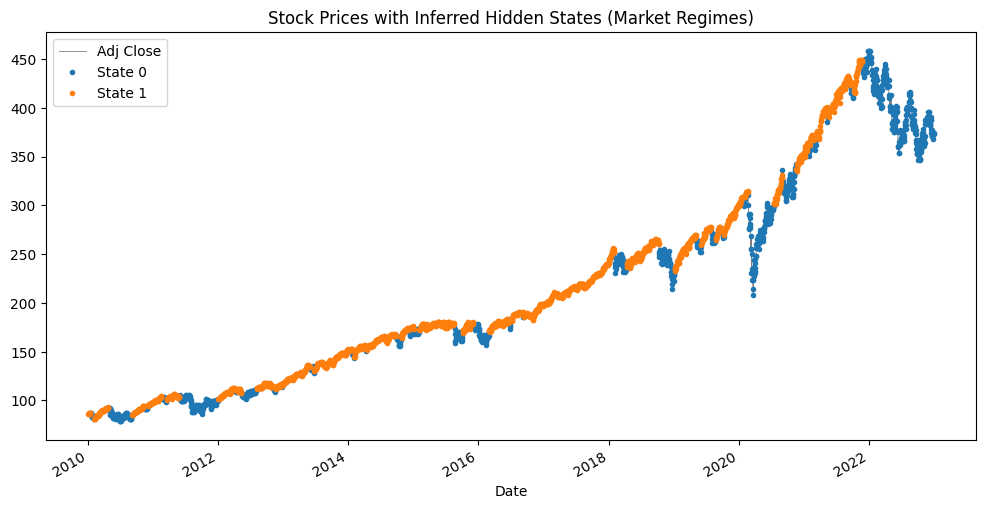

In [15]:
plot_hidden_states(stock_data, hidden_states)

In [16]:
analyze_hmm_parameters(model, hidden_states)

Hidden state 0:
Mean = [-0.10923194]
Covariance = [[2.2421092]]

Hidden state 1:
Mean = [0.06461745]
Covariance = [[0.25399163]]

Transition Matrix:
[[0.95709556 0.04290444]
 [0.02579626 0.97420374]]


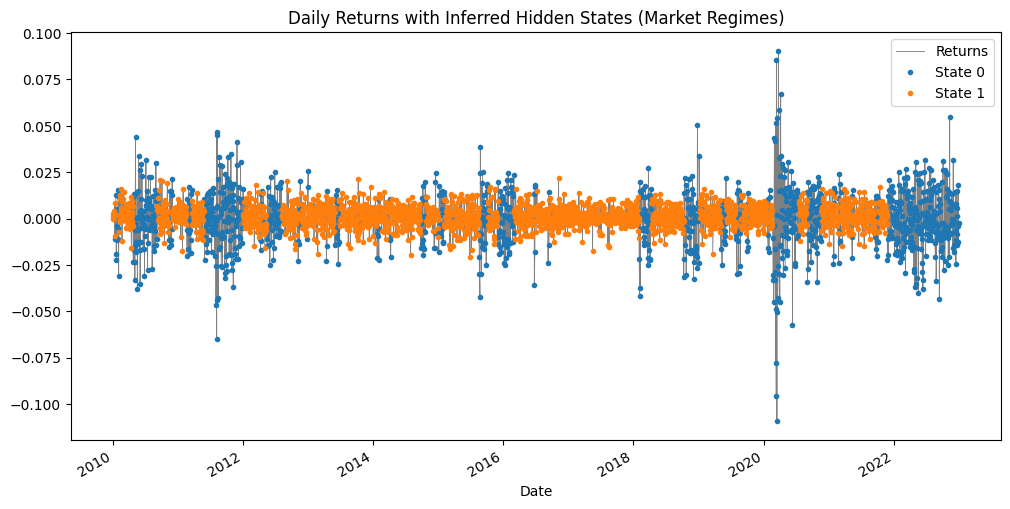

In [17]:
plot_returns_and_states(stock_data, hidden_states)

In [18]:
current_state = hidden_states[-1] 
predict_future_state(model, current_state)

Predicted future state: 0 with probability: 0.9570955555195202
